<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_WState_01_GoogleAIStudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ea058d9cca1b067f918364e93a94c9fbcdea46b898c7021cd19926ef3c079a24
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 14.5 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [2]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np

In [120]:
# 1. 양자 회로 생성
qc = QuantumCircuit(3, 3) # 3 큐비트, 3 고전 비트

# 2. W 상태 생성 알고리즘 구현
qc.h(0) # 첫 번째 큐비트에 Hadamard 게이트 적용
qc.cx(0, 1) # 첫 번째 큐비트를 제어 큐비트로 사용하여 두 번째 큐비트에 CNOT 게이트 적용
qc.cry(2*np.arccos(np.sqrt(1/3)), 0, 2) # 제어된 Y 게이트 (각도는 W 상태에 맞게 조정)

# 3. 측정
qc.measure([0, 1, 2], [0, 1, 2])

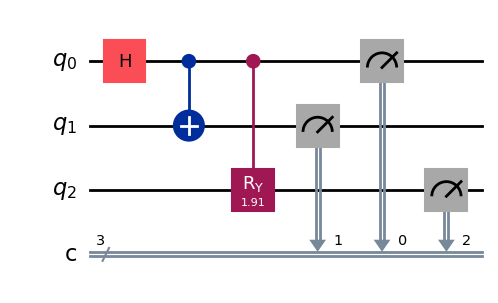

In [121]:
qc.draw(output='mpl')

In [105]:
###균등하게 분할된 상태벡트를 보기 위해서는 측정을 수행하면 않됩니다.
#qc.measure_all()
#qc.draw(output='mpl')

In [122]:
backends = Aer.backends()
backends

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [124]:
# 시뮬레이션 실행
#backend = Aer.get_backend('statevector_simulator')
backend = Aer.get_backend('qasm_simulator')
#backend = Aer.get_backend('aer_simulator')

result = backend.run(qc, shot=1024).result()
counts = result.get_counts()
#statevector = result.get_statevector()


In [125]:
counts

{'011': 171, '111': 361, '000': 492}

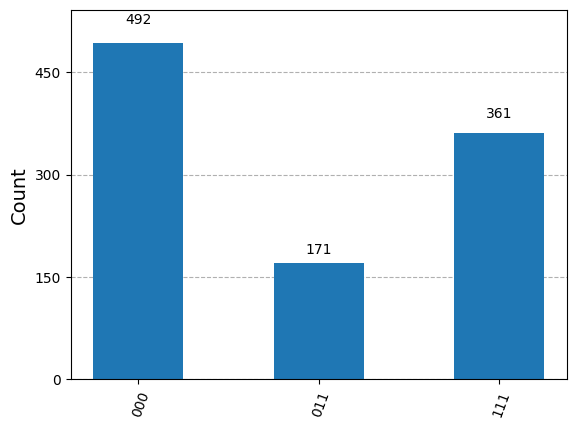

In [126]:
plot_histogram(counts)

In [129]:
# 예시 (간략화된 토모그래피 예시 - 실제 토모그래피는 더 많은 측정을 필요로 합니다):
from qiskit.quantum_info import Statevector, partial_trace
target_state = Statevector([0, 1/np.sqrt(3), 1/np.sqrt(3), 0, 1/np.sqrt(3), 0, 0, 0])
measured_state = Statevector.from_label(max(counts, key=counts.get)) # 가장 많이 측정된 상태
fidelity = np.abs(target_state.data.conj() @ measured_state.data)**2
print(f"Fidelity: {fidelity}")

Fidelity: 0.0


In [130]:
from qiskit.visualization import array_to_latex

# import state-vector and random state-vector from
# IBM's Qiskit quantum information module
from qiskit.quantum_info import Statevector, random_statevector

# import abstract operator and pauli operator from
# IBM's Qiskit quantum information's operators module
from qiskit.quantum_info.operators import Operator, Pauli

In [131]:
statevector.draw("latex")

<IPython.core.display.Latex object>